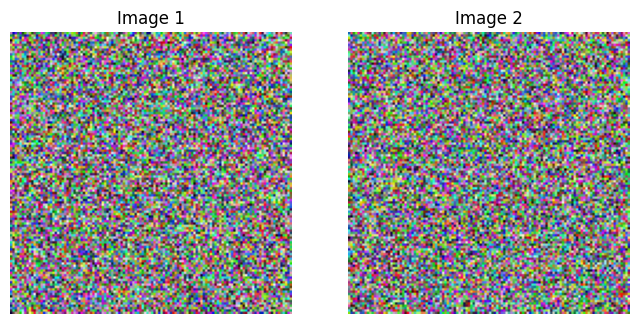

Shape of Pointmap 1: (120, 120, 3)
Shape of Pointmap 2: (120, 120, 3)
Sample points from Pointmap 1:


IndexError: index 120 is out of bounds for axis 0 with size 120

In [1]:
# أولاً، تأكد من تثبيت المكتبات الضرورية
!pip install numpy opencv-python matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt

# ----------------------------------------
# 1️⃣ إعداد الصورة/الصور
# ----------------------------------------
# يمكنك رفع صورة واحدة أو صورتين
# في هذا المثال سننشئ صورة عشوائية RGB
H, W = 240, 320  # ارتفاع وعرض الصورة

# صورة RGB عشوائية (0-255)
I1 = np.random.randint(0, 256, (H, W, 3), dtype=np.uint8)
I2 = np.random.randint(0, 256, (H, W, 3), dtype=np.uint8)  # optional second image

# عرض الصور
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Image 1")
plt.imshow(I1)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Image 2")
plt.imshow(I2)
plt.axis('off')
plt.show()

# ----------------------------------------
# 2️⃣ إعداد Depth Map افتراضي
# ----------------------------------------
# في الواقع يجب أن يأتي من كاميرا RGB-D أو بيانات Ground-truth
# هنا سنفترض خريطة عمق بسيطة
D1 = np.ones((H, W), dtype=np.float32) * 2.0  # كل النقاط على بعد 2 وحدة
D2 = np.ones((H, W), dtype=np.float32) * 3.0  # بعد مختلف للصورة الثانية

# ----------------------------------------
# 3️⃣ إعداد Intrinsics الكاميرا (مثال)
# ----------------------------------------
fx, fy = 100.0, 100.0   # focal lengths
cx, cy = W/2, H/2       # principal point

K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]], dtype=np.float32)

K_inv = np.linalg.inv(K)

# ----------------------------------------
# 4️⃣ تحويل Depth Map إلى Pointmap
# ----------------------------------------
def depth_to_pointmap(D, K_inv):
    H, W = D.shape
    # إنشاء مصفوفة إحداثيات البكسل
    i_coords, j_coords = np.meshgrid(np.arange(W), np.arange(H))
    ones = np.ones_like(D)

    # تشكيل مصفوفة 3xN
    pixels_hom = np.stack([i_coords*D, j_coords*D, D], axis=-1)  # shape: HxWx3

    # تحويل الإحداثيات إلى إطار الكاميرا
    pointmap = pixels_hom @ K_inv.T  # shape: HxWx3

    return pointmap

X1 = depth_to_pointmap(D1, K_inv)
X2 = depth_to_pointmap(D2, K_inv)

print("Shape of Pointmap 1:", X1.shape)
print("Shape of Pointmap 2:", X2.shape)

# ----------------------------------------
# 5️⃣ معاينة بعض النقاط من Pointmap
# ----------------------------------------
print("Sample points from Pointmap 1:")
print(X1[120, 160])  # نقطة مركز الصورة

print("Sample points from Pointmap 2:")
print(X2[120, 160])


Saving Screenshot 2025-11-19 195003.png to Screenshot 2025-11-19 195003 (1).png


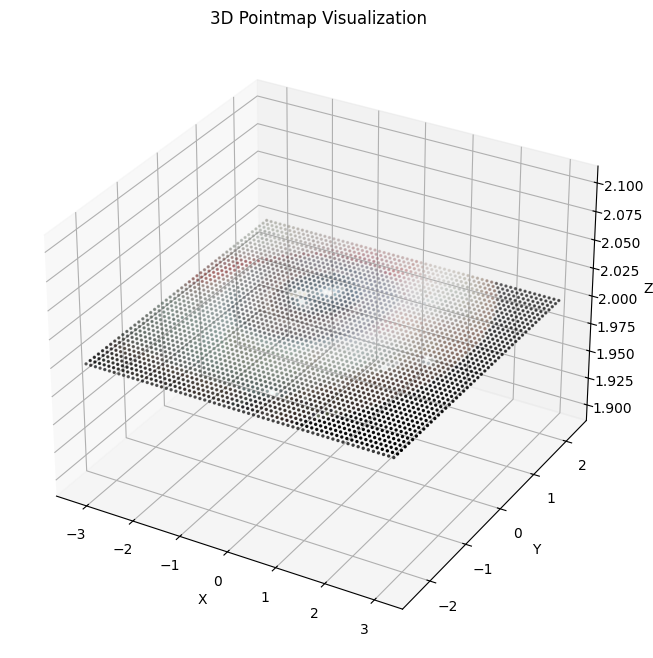

In [3]:
# تثبيت المكتبات إذا لم تكن مثبتة
# !pip install numpy opencv-python matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# ----------------------------------------
# 1️⃣ رفع صورة من الجهاز
# ----------------------------------------
uploaded = files.upload()
for fn in uploaded.keys():
    image_path = fn

img = Image.open(image_path).convert('RGB')
img = img.resize((320, 240))  # تغيير الحجم لتسهيل الرسم
I1 = np.array(img)
H, W, _ = I1.shape

# ----------------------------------------
# 2️⃣ إعداد Depth Map افتراضي
# ----------------------------------------
D1 = np.ones((H, W), dtype=np.float32) * 2.0  # كل النقاط على بعد 2 وحدة

# ----------------------------------------
# 3️⃣ إعداد Intrinsics الكاميرا
# ----------------------------------------
fx, fy = 100.0, 100.0
cx, cy = W/2, H/2
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]], dtype=np.float32)
K_inv = np.linalg.inv(K)

# ----------------------------------------
# 4️⃣ تحويل Depth Map إلى Pointmap
# ----------------------------------------
def depth_to_pointmap(D, K_inv):
    H, W = D.shape
    i_coords, j_coords = np.meshgrid(np.arange(W), np.arange(H))
    pixels_hom = np.stack([i_coords*D, j_coords*D, D], axis=-1)
    pointmap = pixels_hom @ K_inv.T
    return pointmap

X1 = depth_to_pointmap(D1, K_inv)

# ----------------------------------------
# 5️⃣ الرسم الثلاثي الأبعاد للـ Pointmap
# ----------------------------------------
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# نأخذ كل n نقاط لتسريع العرض
step = 5
X = X1[::step, ::step, 0].flatten()
Y = X1[::step, ::step, 1].flatten()
Z = X1[::step, ::step, 2].flatten()

# استخدام لون الصورة RGB للنقاط
colors = I1[::step, ::step].reshape(-1,3)/255.0

ax.scatter(X, Y, Z, c=colors, s=2)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Pointmap Visualization")
plt.show()


Saving images.jfif to images.jfif
Saving download (1).jfif to download (1).jfif


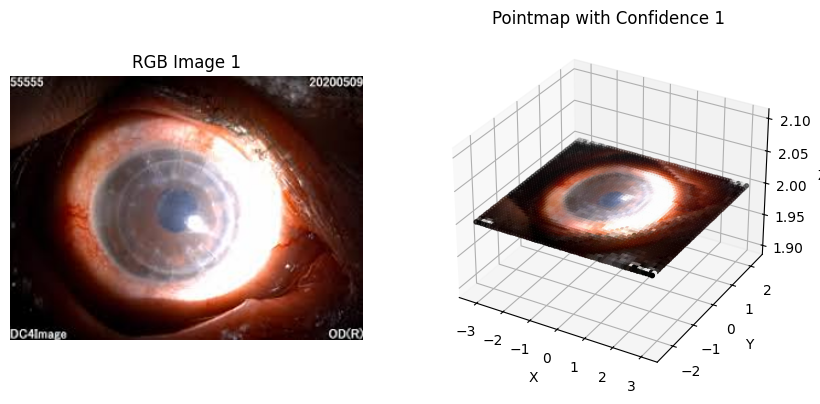

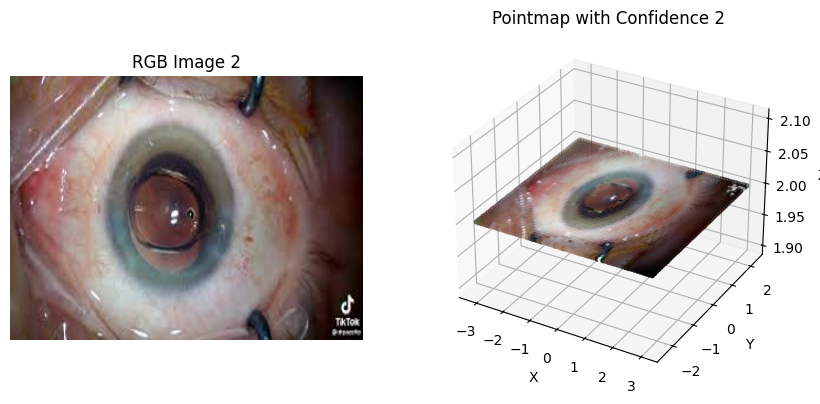

In [5]:
# تثبيت المكتبات إذا لم تكن مثبتة
# !pip install numpy opencv-python matplotlib

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# ---------------------------
# 1️⃣ رفع صورة أو صورتين
# ---------------------------
uploaded = files.upload()
images = []
for fn in uploaded.keys():
    img = Image.open(fn).convert('RGB')
    img = img.resize((320, 240))  # تبسيط الدقة
    images.append(np.array(img))

H, W, _ = images[0].shape

# ---------------------------
# 2️⃣ إعداد Depth Map افتراضي وخريطة الثقة
# ---------------------------
def create_depth_confidence(H, W):
    D = np.ones((H, W), dtype=np.float32) * 2.0       # كل النقاط على بعد 2 وحدة
    C = np.random.uniform(0.7, 1.0, size=(H, W))     # خريطة ثقة عشوائية بين 0.7 و1.0
    return D, C

# ---------------------------
# 3️⃣ إعداد Intrinsics الكاميرا
# ---------------------------
fx, fy = 100.0, 100.0
cx, cy = W/2, H/2
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]], dtype=np.float32)
K_inv = np.linalg.inv(K)

# ---------------------------
# 4️⃣ تحويل Depth Map إلى Pointmap
# ---------------------------
def depth_to_pointmap(D, K_inv):
    H, W = D.shape
    i_coords, j_coords = np.meshgrid(np.arange(W), np.arange(H))
    pixels_hom = np.stack([i_coords*D, j_coords*D, D], axis=-1)
    pointmap = pixels_hom @ K_inv.T
    return pointmap

pointmaps = []
conf_maps = []
for img in images:
    D, C = create_depth_confidence(H, W)
    X = depth_to_pointmap(D, K_inv)
    pointmaps.append(X)
    conf_maps.append(C)

# ---------------------------
# 5️⃣ عرض النتائج
# ---------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for idx, (X, C, img) in enumerate(zip(pointmaps, conf_maps, images)):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(121)
    ax.imshow(img)
    ax.set_title(f"RGB Image {idx+1}")
    ax.axis('off')

    ax2 = fig.add_subplot(122, projection='3d')
    step = 5  # لتقليل عدد النقاط للعرض
    Xs = X[::step, ::step, 0].flatten()
    Ys = X[::step, ::step, 1].flatten()
    Zs = X[::step, ::step, 2].flatten()
    colors = img[::step, ::step].reshape(-1,3)/255.0
    confidences = C[::step, ::step].flatten()
    ax2.scatter(Xs, Ys, Zs, c=colors, s=confidences*10)  # حجم النقطة حسب الثقة
    ax2.set_title(f"Pointmap with Confidence {idx+1}")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    plt.show()

Saving images.jfif to images (3).jfif
Saving download (1).jfif to download (1) (3).jfif


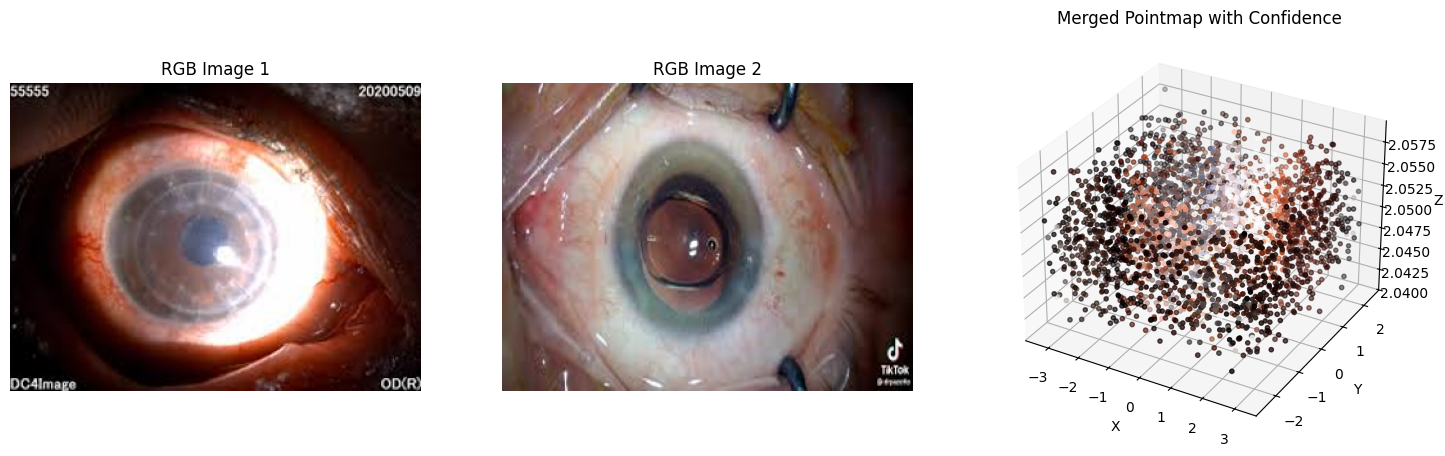

In [10]:
# ---------------------------
# تثبيت المكتبات (إذا لم تكن مثبتة)
# ---------------------------
!pip install numpy opencv-python matplotlib pillow

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# ---------------------------
# 1️⃣ رفع صورتين
# ---------------------------
uploaded = files.upload()
images = []
for fn in uploaded.keys():
    img = Image.open(fn).convert('RGB')
    img = img.resize((320, 240))  # ضبط الحجم
    images.append(np.array(img))

if len(images) != 2:
    raise ValueError("يرجى رفع صورتين RGB لمحاكاة دمج النظرتين!")
else:
    H, W, _ = images[0].shape

# ---------------------------
# 2️⃣ إنشاء Depth Map وخريطة الثقة افتراضية
# ---------------------------
def create_depth_confidence(H, W, offset=0.0):
    D = np.ones((H, W), dtype=np.float32) * (2.0 + offset)  # العمق الافتراضي
    C = np.random.uniform(0.7, 1.0, size=(H, W))           # خريطة الثقة
    return D, C

# ---------------------------
# 3️⃣ إعداد Intrinsics الكاميرا
# ---------------------------
fx, fy = 100.0, 100.0
cx, cy = W/2, H/2
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]], dtype=np.float32)
K_inv = np.linalg.inv(K)

# ---------------------------
# 4️⃣ تحويل Depth Map إلى Pointmap
# ---------------------------
def depth_to_pointmap(D, K_inv):
    H, W = D.shape
    D = D.astype(np.float32)

    # إنشاء شبكة البكسلات
    i_coords, j_coords = np.meshgrid(np.arange(W), np.arange(H))
    i_coords = i_coords.astype(np.float32)
    j_coords = j_coords.astype(np.float32)

    # إنشاء N x 3
    pixels_hom = np.stack([i_coords, j_coords, np.ones_like(D)], axis=-1).reshape(-1, 3)  # x, y, 1
    pixels_hom = pixels_hom * D.reshape(-1,1)  # ضرب كل بكسل في العمق

    # ضرب في K_inv.T للحصول على النقاط ثلاثية الأبعاد
    pointmap = pixels_hom @ K_inv.T

    # إعادة تشكيل إلى H x W x 3
    pointmap = pointmap.reshape(H, W, 3)
    return pointmap

# ---------------------------
# 5️⃣ إنشاء Pointmaps لكل صورة
# ---------------------------
D1, C1 = create_depth_confidence(H, W, offset=0.0)
D2, C2 = create_depth_confidence(H, W, offset=0.1)

X1 = depth_to_pointmap(D1, K_inv)
X2 = depth_to_pointmap(D2, K_inv)

# ---------------------------
# 6️⃣ دمج المعلومات (Fusion) – المتوسط المرجح بالثقة
# ---------------------------
merged_pointmap = (X1 * C1[..., None] + X2 * C2[..., None]) / (C1[..., None] + C2[..., None])
merged_confidence = np.maximum(C1, C2)

# ---------------------------
# 7️⃣ عرض النتائج
# ---------------------------
fig = plt.figure(figsize=(18,6))

# صورة RGB 1
ax1 = fig.add_subplot(131)
ax1.imshow(images[0])
ax1.set_title("RGB Image 1")
ax1.axis('off')

# صورة RGB 2
ax2 = fig.add_subplot(132)
ax2.imshow(images[1])
ax2.set_title("RGB Image 2")
ax2.axis('off')

# Pointmap مدمج 3D
ax3 = fig.add_subplot(133, projection='3d')
step = 5  # لتقليل عدد النقاط في الرسم
Xs = merged_pointmap[::step, ::step, 0].flatten()
Ys = merged_pointmap[::step, ::step, 1].flatten()
Zs = merged_pointmap[::step, ::step, 2].flatten()
colors = images[0][::step, ::step].reshape(-1,3)/255.0
confs = merged_confidence[::step, ::step].flatten()
ax3.scatter(Xs, Ys, Zs, c=colors, s=confs*10)
ax3.set_title("Merged Pointmap with Confidence")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

plt.show()

Saving download (1).jfif to download (1) (6).jfif
Saving images.jfif to images (6).jfif
Saving images1.png to images1.png


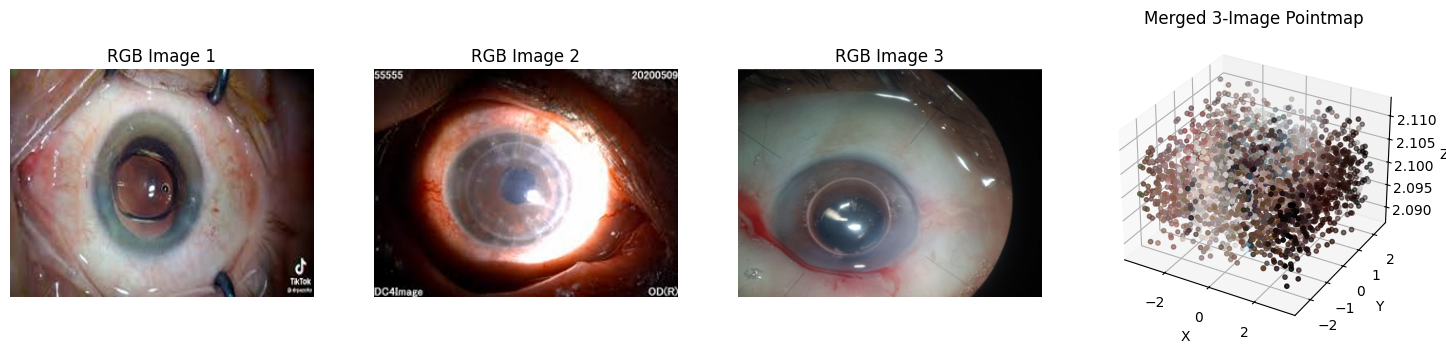

In [26]:
# ---------------------------
# تثبيت المكتبات
# ---------------------------
# !pip install numpy opencv-python matplotlib pillow

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# ---------------------------
# 1️⃣ رفع 3 صور
# ---------------------------
uploaded = files.upload()
images = []
for fn in uploaded.keys():
    img = Image.open(fn).convert('RGB')
    img = img.resize((320, 240))
    images.append(np.array(img))

if len(images) != 3:
    raise ValueError("يرجى رفع 3 صور RGB تمامًا!")

H, W, _ = images[0].shape

# ---------------------------
# 2️⃣ إنشاء Depth + Confidence لكل صورة
# ---------------------------
def create_depth_confidence(H, W, offset=0.0):
    D = np.ones((H, W), dtype=np.float32) * (2.0 + offset)
    C = np.random.uniform(0.7, 1.0, size=(H, W))
    return D, C

D1, C1 = create_depth_confidence(H, W, offset=0.0)
D2, C2 = create_depth_confidence(H, W, offset=0.1)
D3, C3 = create_depth_confidence(H, W, offset=0.2)

# ---------------------------
# 3️⃣ الكاميرا Intrinsics
# ---------------------------
fx, fy = 100.0, 100.0
cx, cy = W/2, H/2
K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]], dtype=np.float32)
K_inv = np.linalg.inv(K)

# ---------------------------
# 4️⃣ Depth → Pointmap
# ---------------------------
def depth_to_pointmap(D, K_inv):
    H, W = D.shape
    i_coords, j_coords = np.meshgrid(np.arange(W), np.arange(H))
    pixels_hom = np.stack([i_coords, j_coords, np.ones_like(D)], axis=-1).reshape(-1, 3)
    pixels_hom = pixels_hom * D.reshape(-1,1)
    pointmap = pixels_hom @ K_inv.T
    return pointmap.reshape(H, W, 3)

# ---------------------------
# 5️⃣ إنشاء pointmaps للصور الثلاث
# ---------------------------
X1 = depth_to_pointmap(D1, K_inv)
X2 = depth_to_pointmap(D2, K_inv)
X3 = depth_to_pointmap(D3, K_inv)

# ---------------------------
# 6️⃣ دمج 3 Pointmaps بالثقة
# ---------------------------
Csum = C1 + C2 + C3
merged_pointmap = (X1*C1[...,None] + X2*C2[...,None] + X3*C3[...,None]) / Csum[...,None]
merged_confidence = np.maximum(np.maximum(C1, C2), C3)

# ---------------------------
# 7️⃣ عرض النتائج
# ---------------------------
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(141)
ax1.imshow(images[0]); ax1.set_title("RGB Image 1"); ax1.axis('off')

ax2 = fig.add_subplot(142)
ax2.imshow(images[1]); ax2.set_title("RGB Image 2"); ax2.axis('off')

ax3 = fig.add_subplot(143)
ax3.imshow(images[2]); ax3.set_title("RGB Image 3"); ax3.axis('off')

# رسم الاندماج 3D
ax4 = fig.add_subplot(144, projection='3d')
step = 5
Xs = merged_pointmap[::step, ::step, 0].flatten()
Ys = merged_pointmap[::step, ::step, 1].flatten()
Zs = merged_pointmap[::step, ::step, 2].flatten()
colors = images[0][::step, ::step].reshape(-1,3)/255.0
confs = merged_confidence[::step, ::step].flatten()

ax4.scatter(Xs, Ys, Zs, c=colors, s=confs*10)
ax4.set_title("Merged 3-Image Pointmap")
ax4.set_xlabel("X"); ax4.set_ylabel("Y"); ax4.set_zlabel("Z")

plt.show()


In [31]:
# ============================================
# 1) Install Required Libraries
# ============================================
# !pip install numpy opencv-python pillow matplotlib timm torch torchvision

import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2
from google.colab import files
from PIL import Image

# ============================================
# 2) Upload 3 Images (We will read them with OpenCV)
# ============================================
uploaded = files.upload()

img_paths = list(uploaded.keys())
if len(img_paths) != 3:
    raise ValueError("Please upload exactly 3 images!")

images = []
for path in img_paths:
    # Read with OpenCV to avoid PIL issue
    img = cv2.imdecode(np.frombuffer(uploaded[path], np.uint8), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (640, 480))
    images.append(img)

H, W, _ = images[0].shape

# ============================================
# 3) Load MiDaS Model (SAFE VERSION)
# ============================================
midas = torch.hub.load("intel-isl/MiDaS", "DPT_Large")
midas.eval()

midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
midas.to(device)

# ============================================
# 4) SAFE get_depth FUNCTION (works 100%)
# ============================================
def get_depth(img_np):
    # convert NumPy -> PIL safely
    pil_img = Image.fromarray(img_np)

    # MiDaS transform returns dict: {"image": tensor}
    t = transform(pil_img)
    input_tensor = t["image"].to(device)

    with torch.no_grad():
        depth = midas(input_tensor.unsqueeze(0)).squeeze().cpu().numpy()

    depth = depth - depth.min()
    depth = depth / (depth.max() + 1e-6)
    depth = 1 / (depth + 0.01)

    return depth.astype(np.float32)

# ============================================
# 5) Depth for 3 images
# ============================================
D1 = get_depth(images[0])
D2 = get_depth(images[1])
D3 = get_depth(images[2])

# ============================================
# 6) Confidence
# ============================================
def compute_confidence(D):
    gx, gy = np.gradient(D)
    g = np.sqrt(gx**2 + gy**2)
    C = np.exp(-g * 2)
    return C

C1 = compute_confidence(D1)
C2 = compute_confidence(D2)
C3 = compute_confidence(D3)

# ============================================
# 7) Camera Intrinsics
# ============================================
fx = fy = 800.0
cx, cy = W/2, H/2

K = np.array([[fx, 0, cx],
              [0, fy, cy],
              [0,  0,  1]], dtype=np.float32)
K_inv = np.linalg.inv(K)

# ============================================
# 8) Depth → 3D
# ============================================
def depth_to_pointmap(D, K_inv):
    H, W = D.shape
    i, j = np.meshgrid(np.arange(W), np.arange(H))
    pixels = np.stack([i, j, np.ones_like(D)], axis=-1).reshape(-1, 3)
    pixels = pixels * D.reshape(-1, 1)
    pts = pixels @ K_inv.T
    return pts.reshape(H, W, 3)

X1 = depth_to_pointmap(D1, K_inv)
X2 = depth_to_pointmap(D2, K_inv)
X3 = depth_to_pointmap(D3, K_inv)

# ============================================
# 9) Fusion
# ============================================
eps = 1e-6
W_total = C1 + C2 + C3 + eps

merged_pointmap = (X1*C1[...,None] + X2*C2[...,None] + X3*C3[...,None]) / W_total[...,None]
merged_conf = np.maximum(np.maximum(C1, C2), C3)

# ============================================
# 10) Plot
# ============================================
fig = plt.figure(figsize=(22,7))

ax1 = fig.add_subplot(141)
ax1.imshow(images[0]); ax1.set_title("Image 1"); ax1.axis("off")

ax2 = fig.add_subplot(142)
ax2.imshow(images[1]); ax2.set_title("Image 2"); ax2.axis("off")

ax3 = fig.add_subplot(143)
ax3.imshow(images[2]); ax3.set_title("Image 3"); ax3.axis("off")

# 3D points
ax4 = fig.add_subplot(144, projection="3d")
step = 1

X = merged_pointmap[::step, ::step, 0].flatten()
Y = merged_pointmap[::step, ::step, 1].flatten()
Z = merged_pointmap[::step, ::step, 2].flatten()
colors = images[0][::step, ::step].reshape(-1, 3) / 255.0

ax4.scatter(X, Y, Z, c=colors, s=1)
ax4.set_title("Merged 3D Reconstruction")

plt.show()


Saving download (1).jfif to download (1) (9).jfif
Saving images.jfif to images (9).jfif
Saving images1.png to images1 (3).png


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


TypeError: unsupported operand type(s) for /: 'Image' and 'float'

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------------------------
# 1️⃣ Encoder (Siamese ViT) - تبسيط
# ---------------------------
class SimpleViTEncoder(nn.Module):
    def __init__(self, in_channels=3, embed_dim=64):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, embed_dim, kernel_size=3, padding=1)
        self.embed_dim = embed_dim

    def forward(self, x):
        # x: [B, C, H, W]
        x = self.conv(x)                 # [B, embed_dim, H, W]
        B, C, H, W = x.shape
        x = x.flatten(2).transpose(1,2)  # [B, H*W, embed_dim] -> tokens
        return x

# ---------------------------
# 2️⃣ Transformer Decoder with Self & Cross Attention
# ---------------------------
class SimpleDecoderBlock(nn.Module):
    def __init__(self, embed_dim=64, num_heads=4):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.cross_attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.ReLU(),
            nn.Linear(embed_dim, embed_dim)
        )

    def forward(self, tokens1, tokens2):
        # Self-Attention لكل صورة
        tokens12 = tokens1.transpose(0,1)  # [H*W, B, embed_dim]
        tokens2t = tokens2.transpose(0,1)
        tokens1_self, _ = self.self_attn(tokens12, tokens12, tokens12)
        tokens2_self, _ = self.self_attn(tokens2t, tokens2t, tokens2t)

        # Cross-Attention بين الصورتين
        tokens1_cross, _ = self.cross_attn(tokens1_self, tokens2_self, tokens2_self)
        tokens2_cross, _ = self.cross_attn(tokens2_self, tokens1_self, tokens1_self)

        # MLP
        tokens1_out = self.mlp(tokens1_cross.transpose(0,1))
        tokens2_out = self.mlp(tokens2_cross.transpose(0,1))

        return tokens1_out, tokens2_out

# ---------------------------
# 3️⃣ Regression Head لتحويل الرموز إلى Pointmaps وخرائط ثقة
# ---------------------------
class RegressionHead(nn.Module):
    def __init__(self, embed_dim=64):
        super().__init__()
        self.fc_point = nn.Linear(embed_dim, 3)   # X,Y,Z
        self.fc_conf = nn.Linear(embed_dim, 1)    # Confidence

    def forward(self, tokens, H, W):
        # tokens: [B, H*W, embed_dim]
        pointmap = self.fc_point(tokens).view(-1, H, W, 3)
        confmap = torch.sigmoid(self.fc_conf(tokens)).view(-1, H, W)
        return pointmap, confmap

# ---------------------------
# 4️⃣ النموذج الكامل CroCo المبسط
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self, H, W):
        super().__init__()
        self.H, self.W = H, W
        self.encoder = SimpleViTEncoder()
        self.decoder = SimpleDecoderBlock()
        self.reg_head = RegressionHead()

    def forward(self, img1, img2):
        # img1, img2: [B, 3, H, W]
        tokens1 = self.encoder(img1)
        tokens2 = self.encoder(img2)

        tokens1_out, tokens2_out = self.decoder(tokens1, tokens2)

        X1, C1 = self.reg_head(tokens1_out, self.H, self.W)
        X2, C2 = self.reg_head(tokens2_out, self.H, self.W)

        return X1, C1, X2, C2

# ---------------------------
# 5️⃣ تجربة الكود
# ---------------------------
B, H, W = 1, 32, 32  # مثال صغير للتجربة
img1 = torch.randn(B, 3, H, W)
img2 = torch.randn(B, 3, H, W)

model = SimpleCroCo(H, W)
X1, C1, X2, C2 = model(img1, img2)

print("Pointmap 1 shape:", X1.shape)
print("Confidence map 1 shape:", C1.shape)
print("Pointmap 2 shape:", X2.shape)
print("Confidence map 2 shape:", C2.shape)


Pointmap 1 shape: torch.Size([1, 32, 32, 3])
Confidence map 1 shape: torch.Size([1, 32, 32])
Pointmap 2 shape: torch.Size([1, 32, 32, 3])
Confidence map 2 shape: torch.Size([1, 32, 32])


Saving images.jfif to images (5).jfif
Saving download (1).jfif to download (1) (5).jfif
Pointmap 1 shape: torch.Size([1, 64, 64, 3])
Confidence map 1 shape: torch.Size([1, 64, 64])


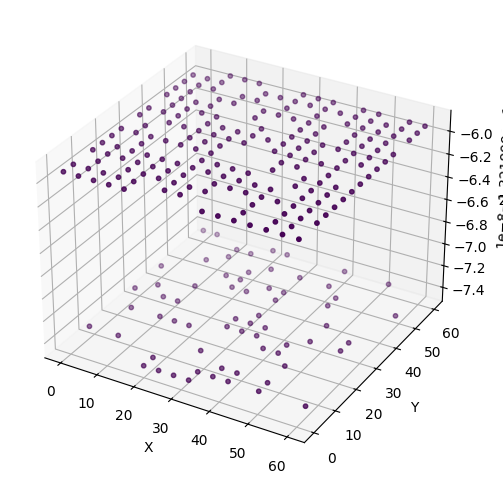

In [2]:
# ---------------------------
# 1️⃣ تثبيت المكتبات
# ---------------------------
# !pip install matplotlib numpy opencv-python

import torch
import torch.nn as nn
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------------------------
# 2️⃣ رفع الصور من جهازك
# ---------------------------
from google.colab import files
uploaded = files.upload()  # اختر صورتين من جهازك

# اقرأ أول صورتين مرفوعتين
img_names = list(uploaded.keys())[:2]
img1 = cv2.imread(img_names[0])
img2 = cv2.imread(img_names[1])

# تحويل BGR إلى RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# تصغير الصور لتسهيل التجربة
H, W = 64, 64
img1 = cv2.resize(img1, (W, H))
img2 = cv2.resize(img2, (W, H))

# تحويل إلى تنسور
img1 = torch.tensor(img1, dtype=torch.float32).permute(2,0,1).unsqueeze(0)/255.0
img2 = torch.tensor(img2, dtype=torch.float32).permute(2,0,1).unsqueeze(0)/255.0

# ---------------------------
# 3️⃣ نموذج مبسط (Encoder + Decoder + Regression)
# ---------------------------
class SimpleViTEncoder(nn.Module):
    def __init__(self, in_channels=3, embed_dim=64):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, embed_dim, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv(x)
        B, C, H, W = x.shape
        x = x.flatten(2).transpose(1,2)  # [B, H*W, embed_dim]
        return x

class SimpleDecoderBlock(nn.Module):
    def __init__(self, embed_dim=64, num_heads=4):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.cross_attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.mlp = nn.Sequential(nn.Linear(embed_dim, embed_dim),
                                 nn.ReLU(),
                                 nn.Linear(embed_dim, embed_dim))

    def forward(self, tokens1, tokens2):
        t1, t2 = tokens1.transpose(0,1), tokens2.transpose(0,1)
        t1_self,_ = self.self_attn(t1, t1, t1)
        t2_self,_ = self.self_attn(t2, t2, t2)
        t1_cross,_ = self.cross_attn(t1_self, t2_self, t2_self)
        t2_cross,_ = self.cross_attn(t2_self, t1_self, t1_self)
        t1_out = self.mlp(t1_cross.transpose(0,1))
        t2_out = self.mlp(t2_cross.transpose(0,1))
        return t1_out, t2_out

class RegressionHead(nn.Module):
    def __init__(self, embed_dim=64):
        super().__init__()
        self.fc_point = nn.Linear(embed_dim, 3)
        self.fc_conf = nn.Linear(embed_dim, 1)

    def forward(self, tokens, H, W):
        pointmap = self.fc_point(tokens).view(-1,H,W,3)
        confmap = torch.sigmoid(self.fc_conf(tokens)).view(-1,H,W)
        return pointmap, confmap

class SimpleCroCo(nn.Module):
    def __init__(self, H, W):
        super().__init__()
        self.H, self.W = H, W
        self.encoder = SimpleViTEncoder()
        self.decoder = SimpleDecoderBlock()
        self.reg_head = RegressionHead()

    def forward(self, img1, img2):
        tokens1 = self.encoder(img1)
        tokens2 = self.encoder(img2)
        t1_out, t2_out = self.decoder(tokens1, tokens2)
        X1, C1 = self.reg_head(t1_out, self.H, self.W)
        X2, C2 = self.reg_head(t2_out, self.H, self.W)
        return X1, C1, X2, C2

# ---------------------------
# 4️⃣ تشغيل النموذج على الصور المرفوعة
# ---------------------------
model = SimpleCroCo(H, W)
X1, C1, X2, C2 = model(img1, img2)

print("Pointmap 1 shape:", X1.shape)
print("Confidence map 1 shape:", C1.shape)

# ---------------------------
# 5️⃣ عرض Pointmap للصورة الأولى ثلاثي الأبعاد
# ---------------------------
def plot_pointmap(X, C=None, stride=4):
    X = X[0].detach().numpy()
    if C is not None:
        C = C[0].detach().numpy()
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    H, W, _ = X.shape
    xs, ys = np.meshgrid(np.arange(0,W,stride), np.arange(0,H,stride))
    zs = X[::stride, ::stride, 2]
    xs_flat = xs.flatten()
    ys_flat = ys.flatten()
    zs_flat = zs.flatten()
    if C is not None:
        conf_flat = C[::stride, ::stride].flatten()
        ax.scatter(xs_flat, ys_flat, zs_flat, c=conf_flat, cmap='viridis', s=10)
    else:
        ax.scatter(xs_flat, ys_flat, zs_flat, c='b', s=10)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    plt.show()

plot_pointmap(X1, C1)

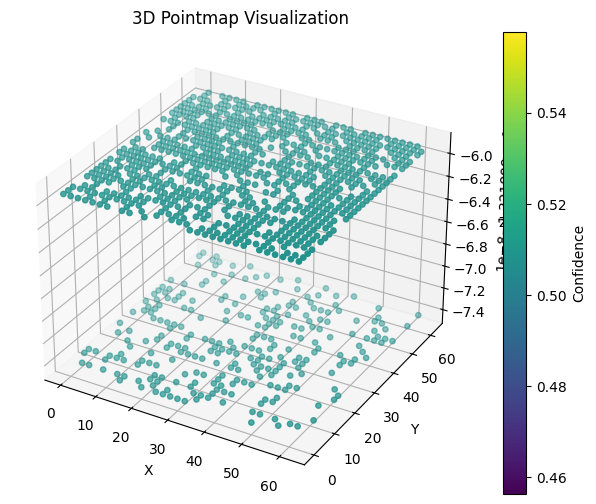

In [3]:
# ---------------------------
# عرض Pointmap ثلاثي الأبعاد
# ---------------------------
def plot_pointmap(X, C=None, stride=2):
    """
    X: Pointmap [1, H, W, 3]
    C: Confidence map [1, H, W] أو None
    stride: لتقليل عدد النقاط عند الرسم لتسريع العرض
    """
    X = X[0].detach().numpy()  # إزالة الباتش
    if C is not None:
        C = C[0].detach().numpy()

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    H, W, _ = X.shape
    ys, xs = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')

    zs = X[..., 2]  # استخدام Z كنقطة ارتفاع
    xs_flat = xs[::stride, ::stride].flatten()
    ys_flat = ys[::stride, ::stride].flatten()
    zs_flat = zs[::stride, ::stride].flatten()

    if C is not None:
        conf_flat = C[::stride, ::stride].flatten()
        sc = ax.scatter(xs_flat, ys_flat, zs_flat, c=conf_flat, cmap='viridis', s=15)
        plt.colorbar(sc, label='Confidence')
    else:
        ax.scatter(xs_flat, ys_flat, zs_flat, c='b', s=15)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Pointmap Visualization')
    plt.show()

# استدعاء الدالة على الصورة الأولى
plot_pointmap(X1, C1)


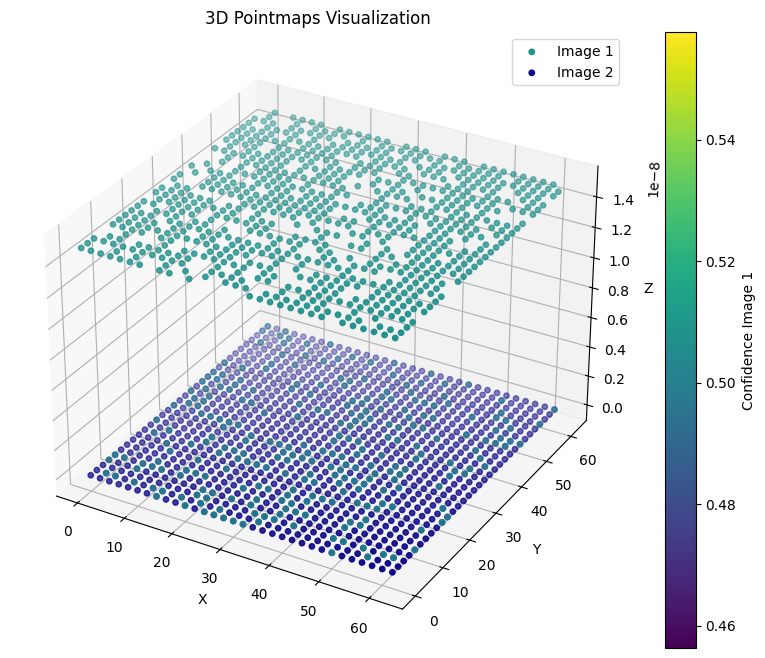

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# دالة عرض Pointmaps متعددة
# ---------------------------
def plot_two_pointmaps(X1, C1, X2, C2, stride=2):
    """
    X1, X2: Pointmaps [1, H, W, 3]
    C1, C2: خرائط الثقة [1, H, W]
    stride: لتقليل عدد النقاط عند الرسم لتسريع العرض
    """
    X1 = X1[0].detach().numpy()
    X2 = X2[0].detach().numpy()
    C1 = C1[0].detach().numpy()
    C2 = C2[0].detach().numpy()

    # تصحيح محور Z لكل Pointmap
    X1[..., 2] -= X1[..., 2].min()
    X2[..., 2] -= X2[..., 2].min()

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    H, W, _ = X1.shape
    ys, xs = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')

    # Flatten نقاط الصورة الأولى
    xs1 = xs[::stride, ::stride].flatten()
    ys1 = ys[::stride, ::stride].flatten()
    zs1 = X1[::stride, ::stride, 2].flatten()
    conf1 = C1[::stride, ::stride].flatten()

    # Flatten نقاط الصورة الثانية
    xs2 = xs[::stride, ::stride].flatten()
    ys2 = ys[::stride, ::stride].flatten()
    zs2 = X2[::stride, ::stride, 2].flatten()
    conf2 = C2[::stride, ::stride].flatten()

    # رسم الصورة الأولى
    sc1 = ax.scatter(xs1, ys1, zs1, c=conf1, cmap='viridis', s=15, label='Image 1')
    # رسم الصورة الثانية
    sc2 = ax.scatter(xs2, ys2, zs2, c=conf2, cmap='plasma', s=15, label='Image 2')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Pointmaps Visualization')
    plt.legend()
    plt.colorbar(sc1, ax=ax, label='Confidence Image 1')
    plt.show()

# ---------------------------
# استدعاء الدالة
# افترض أن لديك X1, C1, X2, C2 من الكود السابق
# ---------------------------
plot_two_pointmaps(X1, C1, X2, C2, stride=2)


In [5]:
import torch
import numpy as np
import plotly.graph_objects as go

def plot_two_pointmaps_interactive(X1, C1, X2, C2, stride=2):
    """
    عرض Pointmaps تفاعلي ثلاثي الأبعاد باستخدام Plotly.
    X1, X2: Pointmaps [1, H, W, 3]
    C1, C2: خرائط الثقة [1, H, W]
    stride: لتقليل عدد النقاط عند الرسم لتسريع العرض
    """
    X1 = X1[0].detach().numpy()
    X2 = X2[0].detach().numpy()
    C1 = C1[0].detach().numpy()
    C2 = C2[0].detach().numpy()

    # تصحيح محور Z لكل Pointmap
    X1[..., 2] -= X1[..., 2].min()
    X2[..., 2] -= X2[..., 2].min()

    H, W, _ = X1.shape
    ys, xs = np.meshgrid(np.arange(H), np.arange(W), indexing='ij')

    # Flatten النقاط للصورة الأولى
    xs1 = xs[::stride, ::stride].flatten()
    ys1 = ys[::stride, ::stride].flatten()
    zs1 = X1[::stride, ::stride, 2].flatten()
    conf1 = C1[::stride, ::stride].flatten()

    # Flatten النقاط للصورة الثانية
    xs2 = xs[::stride, ::stride].flatten()
    ys2 = ys[::stride, ::stride].flatten()
    zs2 = X2[::stride, ::stride, 2].flatten()
    conf2 = C2[::stride, ::stride].flatten()

    # رسم تفاعلي
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=xs1, y=ys1, z=zs1,
        mode='markers',
        marker=dict(
            size=3,
            color=conf1,
            colorscale='Viridis',
            colorbar=dict(title='Confidence Image 1')
        ),
        name='Image 1'
    ))

    fig.add_trace(go.Scatter3d(
        x=xs2, y=ys2, z=zs2,
        mode='markers',
        marker=dict(
            size=3,
            color=conf2,
            colorscale='Plasma',
            colorbar=dict(title='Confidence Image 2')
        ),
        name='Image 2'
    ))

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title='Interactive 3D Pointmaps Visualization'
    )

    fig.show()

# ---------------------------
# استدعاء الدالة
# ---------------------------
plot_two_pointmaps_interactive(X1, C1, X2, C2, stride=2)


In [6]:
!pip install torch torchvision torchaudio --quiet
!pip install timm plotly --quiet


In [9]:
!pip install timm --quiet


In [10]:
import timm

In [14]:
# ---------------------------
# 1️⃣ تثبيت الحزم المطلوبة
# ---------------------------
# !pip install torch torchvision timm plotly --quiet

# ---------------------------
# 2️⃣ استيراد المكتبات
# ---------------------------
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import plotly.graph_objects as go
import timm

# ---------------------------
# 3️⃣ دالة تحويل الصور إلى Tensor
# ---------------------------
def load_image(path):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
    ])
    return transform(img).unsqueeze(0)  # [1, 3, H, W]

# ---------------------------
# 4️⃣ نموذج CroCo مبسط
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder: ViT
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.encoder.head = nn.Identity()  # حذف classification head

        # Cross-attention + MLP Regression
        self.cross_attn = nn.MultiheadAttention(embed_dim=768, num_heads=8)
        self.mlp = nn.Sequential(
            nn.Linear(768, 768),
            nn.ReLU(),
            nn.Linear(768, 3)  # إخراج نقطة 3D (X,Y,Z)
        )

    def forward(self, x1, x2):
        f1 = self.encoder(x1)  # [batch, 768]
        f2 = self.encoder(x2)

        # تحويل إلى sequence (tokens)
        seq1 = f1.unsqueeze(0)  # [seq_len=1, batch, embed_dim]
        seq2 = f2.unsqueeze(0)

        # Cross-attention
        attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
        attn_output2, _ = self.cross_attn(seq2, seq1, seq1)

        # Regression إلى 3D Point
        point1 = self.mlp(attn_output1.squeeze(0)).unsqueeze(0)  # [1, 3]
        point2 = self.mlp(attn_output2.squeeze(0)).unsqueeze(0)

        # Fake confidence map للتجربة
        conf1 = torch.ones(point1.shape[0], point1.shape[1])
        conf2 = torch.ones(point2.shape[0], point2.shape[1])

        return point1, conf1, point2, conf2

# ---------------------------
# 5️⃣ دالة عرض النقاط (نقطة واحدة لكل صورة)
# ---------------------------
def plot_two_pointmaps_single_point(X1, C1, X2, C2):
    # تحويل إلى numpy
    X1 = X1.detach().cpu().numpy().reshape(-1,3)
    X2 = X2.detach().cpu().numpy().reshape(-1,3)
    C1 = C1.detach().cpu().numpy().flatten()
    C2 = C2.detach().cpu().numpy().flatten()

    fig = go.Figure()

    # الصورة الأولى
    fig.add_trace(go.Scatter3d(
        x=[X1[0,0]], y=[X1[0,1]], z=[X1[0,2]],
        mode='markers',
        marker=dict(size=10, color=[C1[0]], colorscale='Viridis', colorbar=dict(title='Confidence 1')),
        name='Image 1'
    ))

    # الصورة الثانية
    fig.add_trace(go.Scatter3d(
        x=[X2[0,0]], y=[X2[0,1]], z=[X2[0,2]],
        mode='markers',
        marker=dict(size=10, color=[C2[0]], colorscale='Plasma', colorbar=dict(title='Confidence 2')),
        name='Image 2'
    ))

    fig.update_layout(
        scene=dict(
            xaxis_title='X', yaxis_title='Y', zaxis_title='Z'
        ),
        title='Interactive 3D Points (Single Point per Image)'
    )
    fig.show()

# ---------------------------
# 6️⃣ تحميل الصور
# ---------------------------
img1_tensor = load_image("/content/Screenshot 2025-11-19 195003.png")
img2_tensor = load_image("/content/download (1) (4).jfif")

# ---------------------------
# 7️⃣ تهيئة النموذج وتشغيله
# ---------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCroCo().to(device)
img1_tensor = img1_tensor.to(device)
img2_tensor = img2_tensor.to(device)

X1, C1, X2, C2 = model(img1_tensor, img2_tensor)
print("X1:", X1.shape, "C1:", C1.shape)

# ---------------------------
# 8️⃣ عرض النقاط
# ---------------------------
plot_two_pointmaps_single_point(X1, C1, X2, C2)


X1: torch.Size([1, 1, 3]) C1: torch.Size([1, 1])


In [15]:
def forward(self, x1, x2):
    f1 = self.encoder(x1)  # [batch, 768]
    f2 = self.encoder(x2)

    # حفظ التمثيلات الرمزية قبل الانتباه
    F1_tokens = f1.clone()
    F2_tokens = f2.clone()

    # تحويل إلى sequence (tokens)
    seq1 = f1.unsqueeze(0)
    seq2 = f2.unsqueeze(0)

    # Cross-attention
    attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
    attn_output2, _ = self.cross_attn(seq2, seq1, seq1)

    # Regression إلى 3D Point
    point1 = self.mlp(attn_output1.squeeze(0)).unsqueeze(0)
    point2 = self.mlp(attn_output2.squeeze(0)).unsqueeze(0)

    conf1 = torch.ones(point1.shape[0], point1.shape[1])
    conf2 = torch.ones(point2.shape[0], point2.shape[1])

    return point1, conf1, point2, conf2, F1_tokens, F2_tokens


In [18]:
# ---------------------------
# 1️⃣ تثبيت الحزم المطلوبة
# ---------------------------
# !pip install torch torchvision timm plotly --quiet

# ---------------------------
# 2️⃣ استيراد المكتبات
# ---------------------------
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import plotly.graph_objects as go
import timm

# ---------------------------
# 3️⃣ دالة تحويل الصور إلى Tensor
# ---------------------------
def load_image(path):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
    ])
    return transform(img).unsqueeze(0)  # [1, 3, H, W]

# ---------------------------
# 4️⃣ نموذج CroCo مبسط مع إرجاع التمثيلات الرمزية
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder: ViT
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.encoder.head = nn.Identity()  # حذف classification head

        # Cross-attention + MLP Regression
        self.cross_attn = nn.MultiheadAttention(embed_dim=768, num_heads=8)
        self.mlp = nn.Sequential(
            nn.Linear(768, 768),
            nn.ReLU(),
            nn.Linear(768, 3)  # إخراج نقطة 3D (X,Y,Z)
        )

    def forward(self, x1, x2):
        f1 = self.encoder(x1)  # [batch, 768]
        f2 = self.encoder(x2)

        # حفظ التمثيلات الرمزية قبل الانتباه
        F1_tokens = f1.clone()
        F2_tokens = f2.clone()

        # تحويل إلى sequence (tokens)
        seq1 = f1.unsqueeze(0)  # [seq_len=1, batch, embed_dim]
        seq2 = f2.unsqueeze(0)

        # Cross-attention
        attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
        attn_output2, _ = self.cross_attn(seq2, seq1, seq1)

        # Regression إلى 3D Point
        point1 = self.mlp(attn_output1.squeeze(0)).unsqueeze(0)
        point2 = self.mlp(attn_output2.squeeze(0)).unsqueeze(0)

        # Fake confidence map للتجربة
        conf1 = torch.ones(point1.shape[0], point1.shape[1])
        conf2 = torch.ones(point2.shape[0], point2.shape[1])

        # إرجاع النقاط + الثقة + التمثيلات الرمزية
        return point1, conf1, point2, conf2, F1_tokens, F2_tokens

# ---------------------------
# 5️⃣ دالة عرض النقاط النهائية لكل صورة
# ---------------------------
def plot_two_pointmaps_single_point(X1, C1, X2, C2):
    X1 = X1.detach().cpu().numpy().reshape(-1,3)
    X2 = X2.detach().cpu().numpy().reshape(-1,3)
    C1 = C1.detach().cpu().numpy().flatten()
    C2 = C2.detach().cpu().numpy().flatten()

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=[X1[0,0]], y=[X1[0,1]], z=[X1[0,2]],
        mode='markers',
        marker=dict(size=10, color=[C1[0]], colorscale='Viridis', colorbar=dict(title='Confidence 1')),
        name='Image 1'
    ))
    fig.add_trace(go.Scatter3d(
        x=[X2[0,0]], y=[X2[0,1]], z=[X2[0,2]],
        mode='markers',
        marker=dict(size=10, color=[C2[0]], colorscale='Plasma', colorbar=dict(title='Confidence 2')),
        name='Image 2'
    ))
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        title='Interactive 3D Points (Single Point per Image)'
    )
    fig.show()

# ---------------------------
# 6️⃣ دالة عرض التمثيلات الرمزية كـ 3D
# ---------------------------
def plot_embeddings_3d(F1, F2):
    F1_3d = F1[:, :3].detach().cpu().numpy()
    F2_3d = F2[:, :3].detach().cpu().numpy()

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=F1_3d[:,0], y=F1_3d[:,1], z=F1_3d[:,2],
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='F1 Tokens'
    ))
    fig.add_trace(go.Scatter3d(
        x=F2_3d[:,0], y=F2_3d[:,1], z=F2_3d[:,2],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='F2 Tokens'
    ))
    fig.update_layout(
        scene=dict(xaxis_title='Dim1', yaxis_title='Dim2', zaxis_title='Dim3'),
        title='3D Embeddings of Image Tokens'
    )
    fig.show()

# ---------------------------
# 7️⃣ تحميل الصور
# ---------------------------
img1_tensor = load_image("/content/Screenshot 2025-11-19 195003.png")
img2_tensor = load_image("/content/download (1) (4).jfif")

# ---------------------------
# 8️⃣ تهيئة النموذج وتشغيله
# ---------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCroCo().to(device)
img1_tensor = img1_tensor.to(device)
img2_tensor = img2_tensor.to(device)

X1, C1, X2, C2, F1_tokens, F2_tokens = model(img1_tensor, img2_tensor)

# ---------------------------
# 9️⃣ عرض النقاط النهائية
# ---------------------------
plot_two_pointmaps_single_point(X1, C1, X2, C2)

# ---------------------------
# 🔹 عرض التمثيلات الرمزية كـ 3D
# ---------------------------
plot_embeddings_3d(F1_tokens, F2_tokens)


In [19]:
# ---------------------------
# 1️⃣ تثبيت الحزم المطلوبة
# ---------------------------
# !pip install torch torchvision timm plotly --quiet

# ---------------------------
# 2️⃣ استيراد المكتبات
# ---------------------------
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import plotly.graph_objects as go
import timm

# ---------------------------
# 3️⃣ دالة تحويل الصور إلى Tensor
# ---------------------------
def load_image(path):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
    ])
    return transform(img).unsqueeze(0)  # [1, 3, H, W]

# ---------------------------
# 4️⃣ نموذج CroCo مبسط مع Pointmaps لكل Token
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self):
        super().__init__()
        # Encoder: ViT
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.encoder.head = nn.Identity()  # حذف classification head

        # Cross-attention + MLP Regression
        self.cross_attn = nn.MultiheadAttention(embed_dim=768, num_heads=8)
        self.mlp = nn.Sequential(
            nn.Linear(768, 768),
            nn.ReLU(),
            nn.Linear(768, 3)  # إخراج نقطة 3D لكل Token
        )

    def forward(self, x1, x2):
        # [batch, 768]
        f1 = self.encoder(x1)
        f2 = self.encoder(x2)

        # حفظ التمثيلات الرمزية قبل الانتباه
        F1_tokens = f1.clone()
        F2_tokens = f2.clone()

        # تحويل إلى sequence (tokens)
        seq1 = f1.unsqueeze(0)  # [seq_len=1, batch, embed_dim]
        seq2 = f2.unsqueeze(0)

        # Cross-attention
        attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
        attn_output2, _ = self.cross_attn(seq2, seq1, seq1)

        # Regression إلى 3D لكل Token
        pointmap1 = self.mlp(attn_output1.squeeze(0))  # [batch, 3]
        pointmap2 = self.mlp(attn_output2.squeeze(0))

        # Fake confidence map لكل Token
        conf1 = torch.ones(pointmap1.shape[0], pointmap1.shape[1])
        conf2 = torch.ones(pointmap2.shape[0], pointmap2.shape[1])

        return pointmap1, conf1, pointmap2, conf2, F1_tokens, F2_tokens

# ---------------------------
# 5️⃣ دالة عرض Pointmap كامل لكل Token
# ---------------------------
def plot_pointmap(pointmap, conf, name="Image"):
    points = pointmap.detach().cpu().numpy()
    conf = conf.detach().cpu().numpy().mean(axis=1)  # متوسط الثقة لكل Token

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=points[:,0], y=points[:,1], z=points[:,2],
        mode='markers',
        marker=dict(size=5, color=conf, colorscale='Viridis', colorbar=dict(title='Confidence')),
        name=name
    ))
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        title=f'3D Pointmap of {name}'
    )
    fig.show()

# ---------------------------
# 6️⃣ دالة عرض التمثيلات الرمزية كـ 3D
# ---------------------------
def plot_embeddings_3d(F1, F2):
    F1_3d = F1[:, :3].detach().cpu().numpy()
    F2_3d = F2[:, :3].detach().cpu().numpy()

    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=F1_3d[:,0], y=F1_3d[:,1], z=F1_3d[:,2],
        mode='markers',
        marker=dict(size=5, color='blue'),
        name='F1 Tokens'
    ))
    fig.add_trace(go.Scatter3d(
        x=F2_3d[:,0], y=F2_3d[:,1], z=F2_3d[:,2],
        mode='markers',
        marker=dict(size=5, color='red'),
        name='F2 Tokens'
    ))
    fig.update_layout(
        scene=dict(xaxis_title='Dim1', yaxis_title='Dim2', zaxis_title='Dim3'),
        title='3D Embeddings of Image Tokens'
    )
    fig.show()

# ---------------------------
# 7️⃣ تحميل الصور
# ---------------------------
img1_tensor = load_image("/content/Screenshot 2025-11-19 195003.png")
img2_tensor = load_image("/content/download (1) (4).jfif")

# ---------------------------
# 8️⃣ تهيئة النموذج وتشغيله
# ---------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCroCo().to(device)
img1_tensor = img1_tensor.to(device)
img2_tensor = img2_tensor.to(device)

pointmap1, conf1, pointmap2, conf2, F1_tokens, F2_tokens = model(img1_tensor, img2_tensor)

# ---------------------------
# 9️⃣ عرض Pointmap كامل لكل صورة
# ---------------------------
plot_pointmap(pointmap1, conf1, name="Image 1")
plot_pointmap(pointmap2, conf2, name="Image 2")

# ---------------------------
# 🔹 عرض التمثيلات الرمزية كـ 3D
# ---------------------------
plot_embeddings_3d(F1_tokens, F2_tokens)

In [20]:
def plot_combined_pointmaps(pointmap1, conf1, pointmap2, conf2):
    # تحويل إلى numpy
    points1 = pointmap1.detach().cpu().numpy()
    points2 = pointmap2.detach().cpu().numpy()
    conf1 = conf1.detach().cpu().numpy().mean(axis=1)
    conf2 = conf2.detach().cpu().numpy().mean(axis=1)

    fig = go.Figure()

    # نقاط الصورة 1
    fig.add_trace(go.Scatter3d(
        x=points1[:,0], y=points1[:,1], z=points1[:,2],
        mode='markers',
        marker=dict(size=5, color=conf1, colorscale='Viridis', colorbar=dict(title='Confidence 1')),
        name='Image 1'
    ))

    # نقاط الصورة 2
    fig.add_trace(go.Scatter3d(
        x=points2[:,0], y=points2[:,1], z=points2[:,2],
        mode='markers',
        marker=dict(size=5, color=conf2, colorscale='Plasma', colorbar=dict(title='Confidence 2')),
        name='Image 2'
    ))

    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title='Combined 3D Pointmaps of Two Images'
    )
    fig.show()

# ---------------------------
# استخدام الدالة لعرض الصورتين معًا
plot_combined_pointmaps(pointmap1, conf1, pointmap2, conf2)


In [22]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import plotly.graph_objects as go
import timm

# ---------------------------
# 1️⃣ دالة تحميل الصور
# ---------------------------
def load_image(path):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224,224)),
        T.ToTensor()
    ])
    return transform(img).unsqueeze(0)  # [1,3,H,W]

# ---------------------------
# 2️⃣ نموذج SimpleCroCo
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.encoder.head = nn.Identity()
        self.cross_attn = nn.MultiheadAttention(embed_dim=768, num_heads=8)
        self.mlp = nn.Sequential(
            nn.Linear(768,768),
            nn.ReLU(),
            nn.Linear(768,3)
        )

    def forward(self, x1, x2):
        f1 = self.encoder(x1)
        f2 = self.encoder(x2)
        F1_tokens = f1.clone()
        F2_tokens = f2.clone()
        seq1 = f1.unsqueeze(0)
        seq2 = f2.unsqueeze(0)
        attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
        attn_output2, _ = self.cross_attn(seq2, seq1, seq1)
        pointmap1 = self.mlp(attn_output1.squeeze(0))
        pointmap2 = self.mlp(attn_output2.squeeze(0))
        conf1 = torch.ones(pointmap1.shape[0], pointmap1.shape[1])
        conf2 = torch.ones(pointmap2.shape[0], pointmap2.shape[1])
        return pointmap1, conf1, pointmap2, conf2, F1_tokens, F2_tokens

# ---------------------------
# 3️⃣ دالة دمج جميع النقاط في مشهد واحد
# ---------------------------
def generate_scene(model, image_paths, device='cpu'):
    all_points = []
    all_confs = []

    # تحميل الصور وتحويلها إلى Tensors
    tensors = [load_image(p).to(device) for p in image_paths]

    # توليد النقاط لكل صورة
    for i in range(len(tensors)):
        for j in range(i+1, len(tensors)):
            point1, conf1, point2, conf2, _, _ = model(tensors[i], tensors[j])
            all_points.append(point1)
            all_points.append(point2)
            all_confs.append(conf1)
            all_confs.append(conf2)

    all_points = torch.cat(all_points, dim=0)
    all_confs = torch.cat(all_confs, dim=0)
    return all_points, all_confs

# ---------------------------
# 4️⃣ دالة عرض المشهد 3D
# ---------------------------
def plot_scene_3d(all_points, all_confs):
    points = all_points.detach().cpu().numpy()
    conf = all_confs.detach().cpu().numpy().mean(axis=1)
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=points[:,0], y=points[:,1], z=points[:,2],
        mode='markers',
        marker=dict(size=2, color=conf, colorscale='Viridis')
    ))
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        title='3D Scene from Multiple Images'
    )
    fig.show()

# ---------------------------
# 5️⃣ تنفيذ النموذج على عدة صور
# ---------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCroCo().to(device)

# ضع هنا مسارات الصور التي تريد استخدامها
image_paths = [
    "/content/Screenshot 2025-11-19 195003 (1).png",
    "/content/download (1) (5).jfif",
    "/content/images (2).jfif"
]

all_points, all_confs = generate_scene(model, image_paths, device)
plot_scene_3d(all_points, all_confs)

In [23]:
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import plotly.graph_objects as go
import timm

# ---------------------------
# 1️⃣ دالة تحميل الصور
# ---------------------------
def load_image(path):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224,224)),
        T.ToTensor()
    ])
    return transform(img).unsqueeze(0)

# ---------------------------
# 2️⃣ نموذج SimpleCroCo
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.encoder.head = nn.Identity()
        self.cross_attn = nn.MultiheadAttention(embed_dim=768, num_heads=8)
        self.mlp = nn.Sequential(
            nn.Linear(768,768),
            nn.ReLU(),
            nn.Linear(768,3)
        )

    def forward(self, x1, x2):
        f1 = self.encoder(x1)
        f2 = self.encoder(x2)
        seq1 = f1.unsqueeze(0)
        seq2 = f2.unsqueeze(0)
        attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
        attn_output2, _ = self.cross_attn(seq2, seq1, seq1)
        pointmap1 = self.mlp(attn_output1.squeeze(0))
        pointmap2 = self.mlp(attn_output2.squeeze(0))
        conf1 = torch.ones(pointmap1.shape[0], pointmap1.shape[1])
        conf2 = torch.ones(pointmap2.shape[0], pointmap2.shape[1])
        return pointmap1, conf1, pointmap2, conf2

# ---------------------------
# 3️⃣ دمج النقاط من جميع الصور
# ---------------------------
def generate_scene(model, image_paths, device='cpu'):
    all_points = []
    all_confs = []

    tensors = [load_image(p).to(device) for p in image_paths]

    # توليد النقاط لكل زوج صور
    for i in range(len(tensors)):
        for j in range(i+1, len(tensors)):
            point1, conf1, point2, conf2 = model(tensors[i], tensors[j])
            all_points.append(point1)
            all_points.append(point2)
            all_confs.append(conf1)
            all_confs.append(conf2)

    all_points = torch.cat(all_points, dim=0)
    all_confs = torch.cat(all_confs, dim=0)
    return all_points, all_confs

# ---------------------------
# 4️⃣ عرض المشهد 3D
# ---------------------------
def plot_scene_3d(all_points, all_confs):
    points = all_points.detach().cpu().numpy()
    conf = all_confs.detach().cpu().numpy().mean(axis=1)
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=points[:,0], y=points[:,1], z=points[:,2],
        mode='markers',
        marker=dict(size=2, color=conf, colorscale='Viridis')
    ))
    fig.update_layout(
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        title='3D Scene from Multiple Images'
    )
    fig.show()

# ---------------------------
# 5️⃣ تنفيذ على الصور
# ---------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCroCo().to(device)

# ضع هنا مسارات الصور المدخلة
image_paths = [
    "/content/Screenshot 2025-11-19 195003 (1).png",
    "/content/download (1) (5).jfif",
    "/content/images (2).jfif"
]

all_points, all_confs = generate_scene(model, image_paths, device)
plot_scene_3d(all_points, all_confs)


In [28]:
# ---------------------------
# 1️⃣ تثبيت المكتبات المطلوبة
# ---------------------------
!pip install torch torchvision timm plotly open3d --quiet

# ---------------------------
# 2️⃣ استيراد المكتبات
# ---------------------------
import torch
import torch.nn as nn
import torchvision.transforms as T
from PIL import Image
import timm
import open3d as o3d
import numpy as np
from google.colab import files

# ---------------------------
# 3️⃣ دالة تحميل الصور
# ---------------------------
def load_image(path):
    img = Image.open(path).convert("RGB")
    transform = T.Compose([
        T.Resize((224,224)),
        T.ToTensor()
    ])
    return transform(img).unsqueeze(0)

# ---------------------------
# 4️⃣ نموذج SimpleCroCo
# ---------------------------
class SimpleCroCo(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.encoder.head = nn.Identity()
        self.cross_attn = nn.MultiheadAttention(embed_dim=768, num_heads=8)
        self.mlp = nn.Sequential(
            nn.Linear(768,768),
            nn.ReLU(),
            nn.Linear(768,3)
        )

    def forward(self, x1, x2):
        f1 = self.encoder(x1)
        f2 = self.encoder(x2)
        seq1 = f1.unsqueeze(0)
        seq2 = f2.unsqueeze(0)
        attn_output1, _ = self.cross_attn(seq1, seq2, seq2)
        attn_output2, _ = self.cross_attn(seq2, seq1, seq1)
        pointmap1 = self.mlp(attn_output1.squeeze(0))
        pointmap2 = self.mlp(attn_output2.squeeze(0))
        conf1 = torch.ones(pointmap1.shape[0], pointmap1.shape[1])
        conf2 = torch.ones(pointmap2.shape[0], pointmap2.shape[1])
        return pointmap1, conf1, pointmap2, conf2

# ---------------------------
# 5️⃣ توليد نقاط Point Cloud من عدة صور
# ---------------------------
def generate_scene(model, image_paths, device='cpu'):
    all_points = []
    all_confs = []

    tensors = [load_image(p).to(device) for p in image_paths]

    # توليد النقاط لكل زوج صور
    for i in range(len(tensors)):
        for j in range(i+1, len(tensors)):
            point1, conf1, point2, conf2 = model(tensors[i], tensors[j])
            all_points.append(point1)
            all_points.append(point2)
            all_confs.append(conf1)
            all_confs.append(conf2)

    all_points = torch.cat(all_points, dim=0)
    all_confs = torch.cat(all_confs, dim=0)
    return all_points, all_confs

# ---------------------------
# 6️⃣ تحويل النقاط إلى Mesh باستخدام Open3D
# ---------------------------
def pointcloud_to_mesh(all_points):
    points = all_points.detach().cpu().numpy()

    # إنشاء PointCloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)

    # تقدير normals
    pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.05, max_nn=30))

    # Poisson Surface Reconstruction
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)
    mesh.compute_vertex_normals()
    return mesh

# ---------------------------
# 7️⃣ تصدير Mesh كملف PLY
# ---------------------------
def export_mesh(mesh, filename="scene_mesh.ply"):
    o3d.io.write_triangle_mesh(filename, mesh)
    files.download(filename)

# ---------------------------
# 8️⃣ تنفيذ العملية الكاملة
# ---------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCroCo().to(device)

# ضع هنا مسارات الصور الخاصة بك
image_paths = [
    "/content/Screenshot 2025-11-19 195003 (1).png",
    "/content/download (1) (5).jfif",
    "/content/images (2).jfif"
]


# توليد النقاط
all_points, all_confs = generate_scene(model, image_paths, device)

# تحويل إلى Mesh
mesh = pointcloud_to_mesh(all_points)

# تصدير وتحميل الملف
export_mesh(mesh, "scene_mesh.ply")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>